# Praca Domowa 6

In [36]:
import matplotlib.pyplot as plt
import matplotlib.axes
import numpy as np
import pandas as pd

# Zadania

### Zadanie 1

a) Narysować wykres y=x^3+1 dla x z przedziału [-3, 3]. Dodać wycentrowany tytuł oraz opisy osi.

b) Do tego samego wykresu dodać wybraną inną funkcję i oznaczyć ją linią o innym kolorze i grubości. Dodać legendę.

c) Pokazać wykresy z a) i b) osobno używając funkcji subplot().

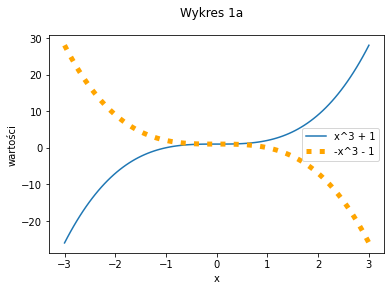

In [27]:
x = np.linspace(-3, 3, 100)
y = np.power(x, 3) + 1
y_2 =  - y + 2
plt.plot(x, y, label = "x^3 + 1")
plt.ylabel("wartości")
plt.xlabel("x")
plt.suptitle("Wykres 1a")
plt.plot(x, y_2, linestyle = ":", color = "orange", linewidth = 5, label = "-x^3 - 1")
plt.legend()
plt.show()

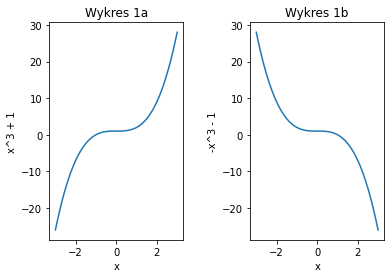

In [40]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(x, y)
ax[0].set_ylabel("x^3 + 1")
ax[0].set_xlabel("x")
ax[0].set_title("Wykres 1a")
ax[1].plot(x, y_2)
ax[1].set_ylabel("-x^3 - 1")
ax[1].set_xlabel("x")
ax[1].set_title("Wykres 1b")
plt.subplots_adjust(wspace=0.5)
plt.show()

# Zadanie 2

a) Narysować wykres słupkowy na podanych danych.

b) Znaleźć sposób (w internecie) na narysowanie wykresu kołowego na podanych danych.
 

In [6]:
labels = ['Blue', 'Red', 'Green', 'Purple']
sizes = [15, 30, 45, 10]

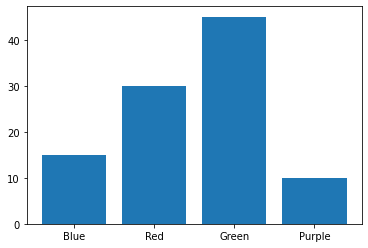

In [7]:
plt.bar(labels, sizes)
plt.show()

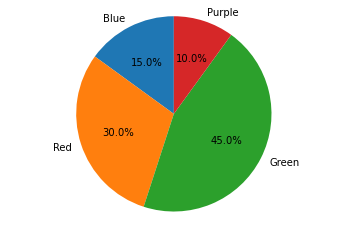

In [14]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90)
ax.axis('equal')
plt.show()

# Zadanie 3

Poprawić wykres tak, aby łatwiej było odczytać w którym województwie śmiertelność wzrosła najbardziej.
Jest przynajmniej kilka innych podejść: scatterplot z latami na osi OX/OY, odcinki zaczynające się w danych ze średniej a kończące w 2020.
Jestem też ciekawa Waszych innych pomysłów.

![https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png](https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png)

Źródło: https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png

In [16]:
wojewodztwo = ["ZACHODNIOPOMORSKIE", "WIELKOPOLSKIE", "WARMINSKO-MAZURSKIE", "SWIETOKRZYSKIE",  "SLASKIE", "POMORSKIE", "PODLASKIE", "PODKARPACKIE", "OPOLSKIE", "MAZOWIECKIE", "MALOPOLSKIE", "LODZKIE", "LUBUSKIE", "LUBELSKIE", "KUJAWSKO-POMORSKIE", "DOLNOSLASKIE"]

l_2020 = [1874, 4013, 1565, 2008, 6270, 2521, 1468, 2909, 1356, 6564, 4743, 3687, 1313, 2731, 2435, 3665]

l_2015_2019 = [1509, 2796, 1241, 1208, 4255, 1830, 1049, 1643, 881, 4811, 2690, 2578, 894, 1920, 1768, 2683]

In [152]:
zmarli_roznica = np.subtract(l_2020, l_2015_2019)
zmarli_proc = zmarli_roznica / l_2015_2019 * 100
zmarli_proc_str = np.array([str(format(num, ".2f")) + '%' for num in zmarli_proc])
df = pd.DataFrame({'wojewodztwo':wojewodztwo, 'zmarli_roznica': zmarli_roznica, 
                   'zmarli_proc_str': zmarli_proc_str, 'zmarli_proc': zmarli_proc})
df = df.sort_values(by='zmarli_roznica', ascending=0).reset_index(drop=True)
df

,wojewodztwo,zmarli_roznica,zmarli_proc_str,zmarli_proc
0,MALOPOLSKIE,2053,76.32%,76.319703
1,SLASKIE,2015,47.36%,47.356052
2,MAZOWIECKIE,1753,36.44%,36.437331
3,PODKARPACKIE,1266,77.05%,77.054169
4,WIELKOPOLSKIE,1217,43.53%,43.526466
5,LODZKIE,1109,43.02%,43.017843
6,DOLNOSLASKIE,982,36.60%,36.600820
7,LUBELSKIE,811,42.24%,42.239583
8,SWIETOKRZYSKIE,800,66.23%,66.225166
9,POMORSKIE,691,37.76%,37.759563


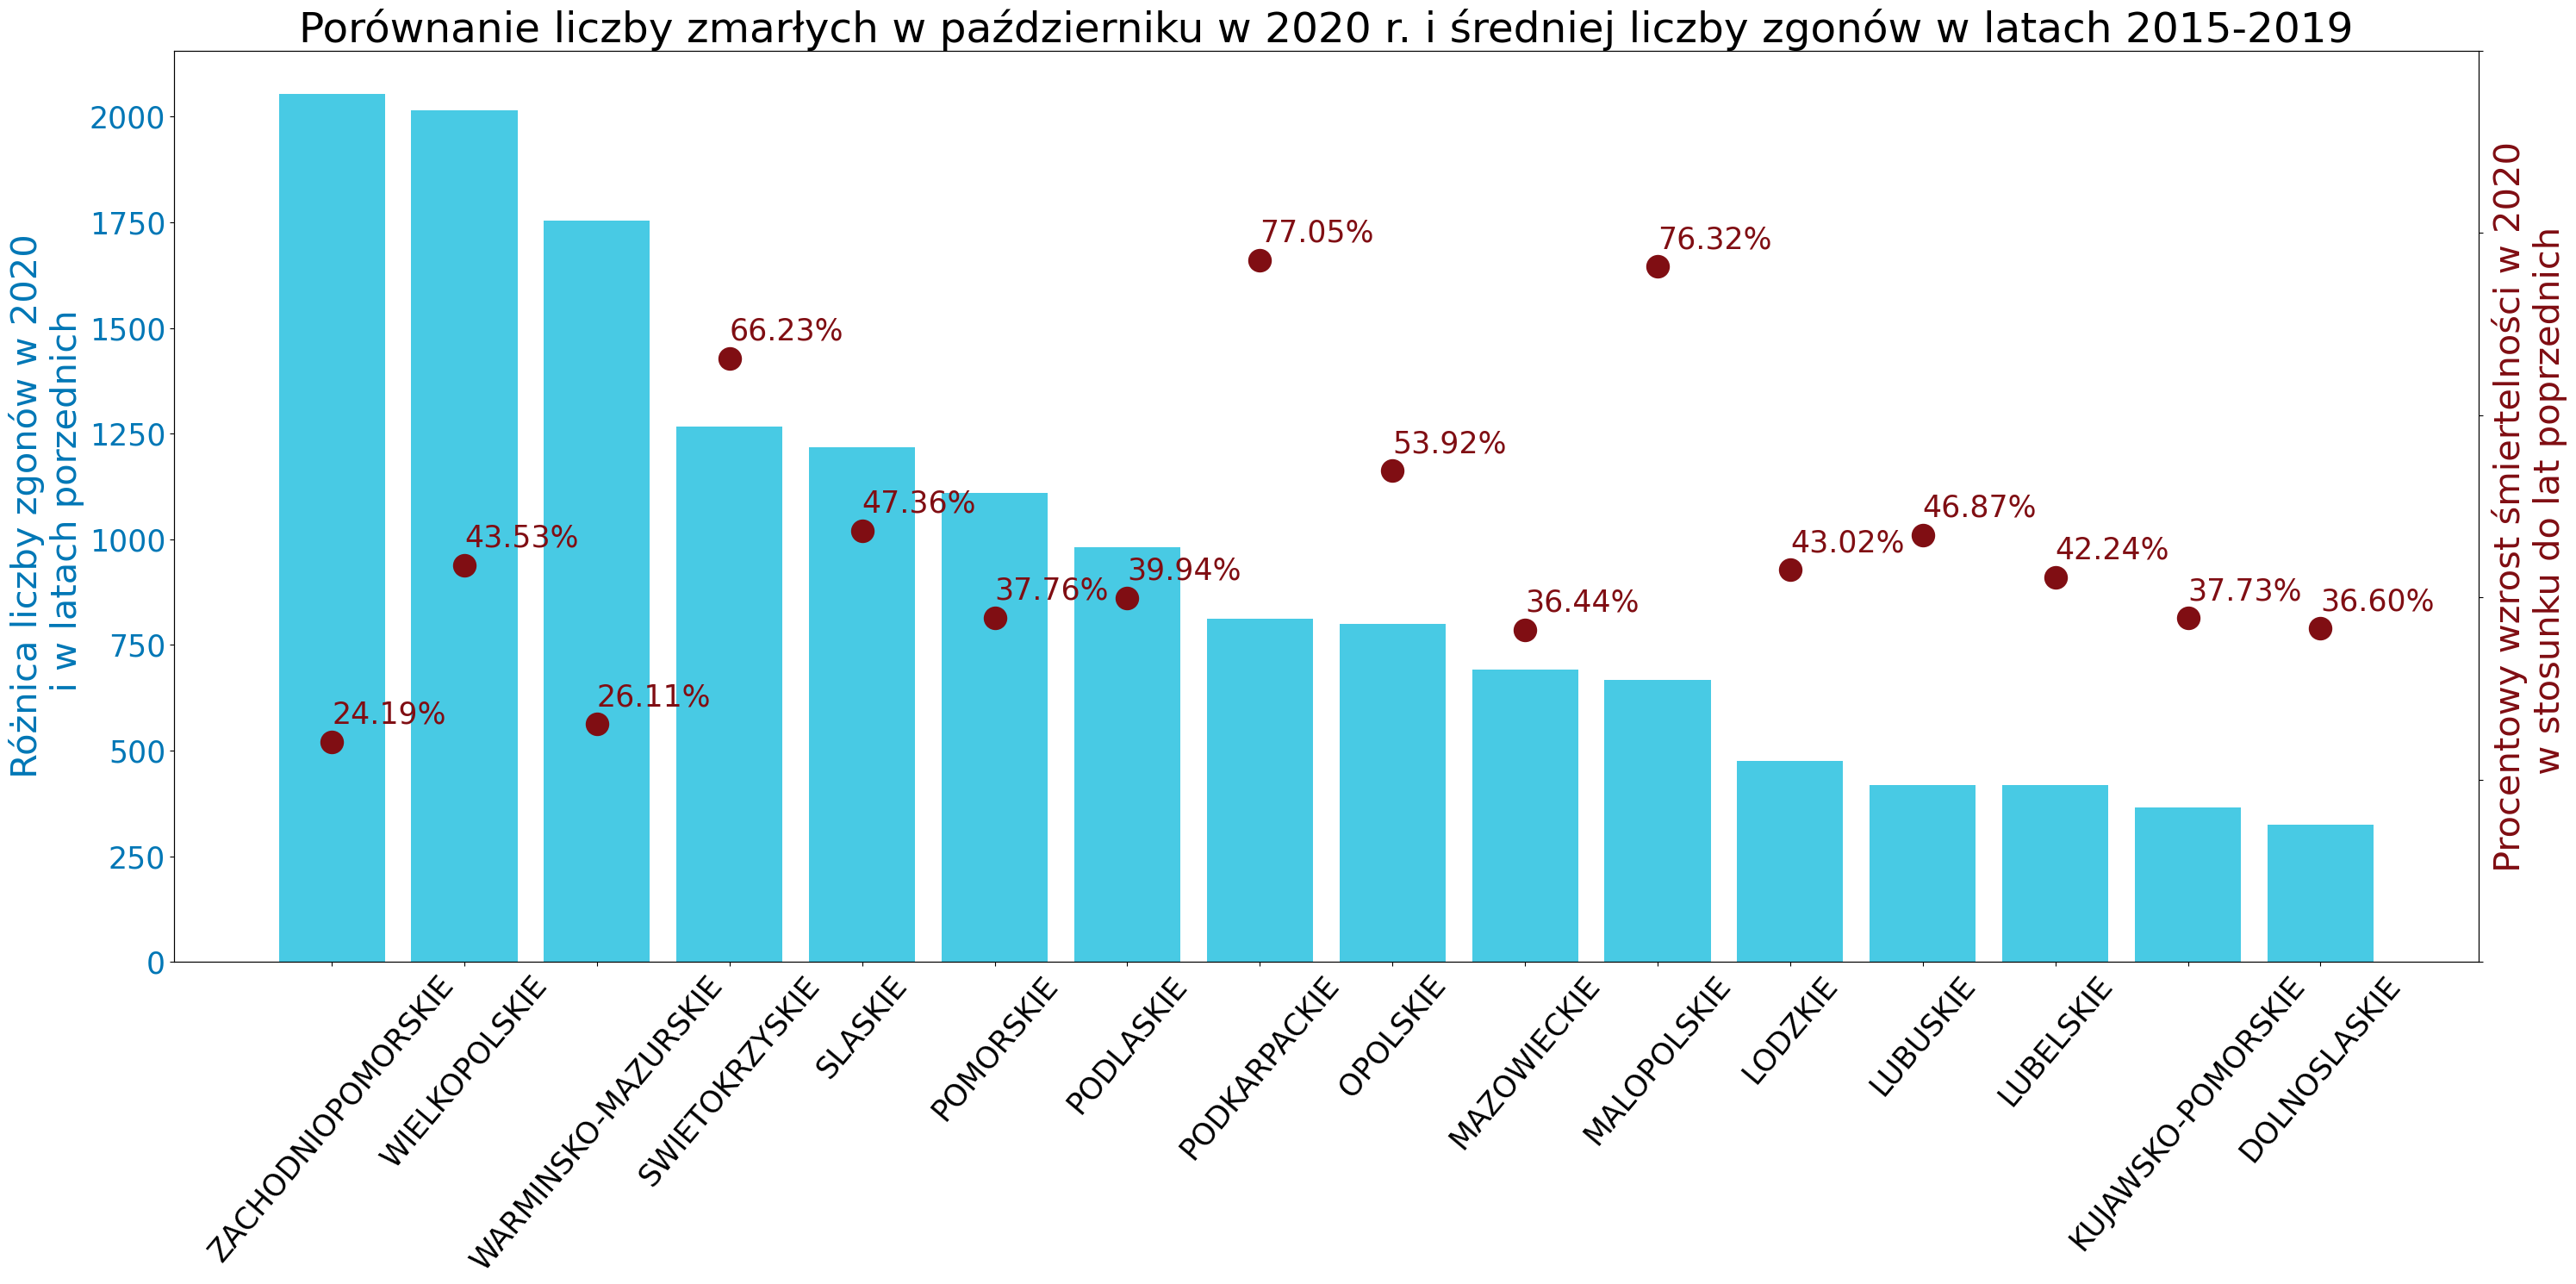

In [180]:
fig, ax1 = plt.subplots()

plt.rcParams['figure.figsize'] = [30, 15]
plt.rcParams['figure.dpi'] = 100
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=30)

plt.title("Porównanie liczby zmarłych w październiku w 2020 r. i średniej liczby zgonów w latach 2015-2019", fontsize = 35)

color = '#48cae4'
ax1.set_ylabel('Różnica liczby zgonów w 2020\n i w latach porzednich', color='#0077b6', fontsize=30)
ax1.bar(df['wojewodztwo'], df['zmarli_roznica'], color=color)
ax1.tick_params(axis='y', labelcolor='#0077b6')
plt.xticks(rotation=50)
ax1.yaxis.set_tick_params(labelsize=25)

ax2 = ax1.twinx()

color = '#800e13'
ax2.set_ylabel('Procentowy wzrost śmiertelności w 2020\n w stosunku do lat poprzednich', color=color, fontsize=30)  # we already handled the x-label with ax1
ax2.scatter(wojewodztwo, zmarli_proc, color = color, marker = "o", s = 350)
ax2.tick_params(axis='y', labelcolor=color)
matplotlib.rc('ytick', labelsize=20)
ax2.set_ylim(0, 100)
ax2.set_yticklabels([])


for i in range(len(df['zmarli_proc'])):
    ax2.annotate(str(df.loc[i, 'zmarli_proc_str']).rstrip(), (df.loc[i, 'wojewodztwo'], df.loc[i, 'zmarli_proc'] + 2),
                fontsize=25, color=color)

fig.tight_layout() 

# Zadanie 4

Zrobić własny wykres w stylu xkcd dotyczący wizualzacji danych. Może być bardzo luźno związany.

Jeśli ktoś nie trafił na komiksy xkcd, to polecam przejrzeć zajrzeć na stronę Randalla Munroe: https://xkcd.com/

Tu kilka przykładów, które mogą być inspiracją albo chociaż rozrywką:
- https://xkcd.com/688/
- https://xkcd.com/1597/ - True story jak Wam pokazałam gita :(
- https://xkcd.com/1945/

Matplotlib pozwala na proste tworzenie wykresów w stylu xkcd, służy do tego funkcja `xkcd()` z `matplotlib.pyplot`.
Warto zajrzeć do dokumentacji: https://matplotlib.org/gallery/showcase/xkcd.html
Mój przykład umieściłam poniżej.

Uwaga, w szczególności styl działa też z wykresami kołowymi i słupkowymi.

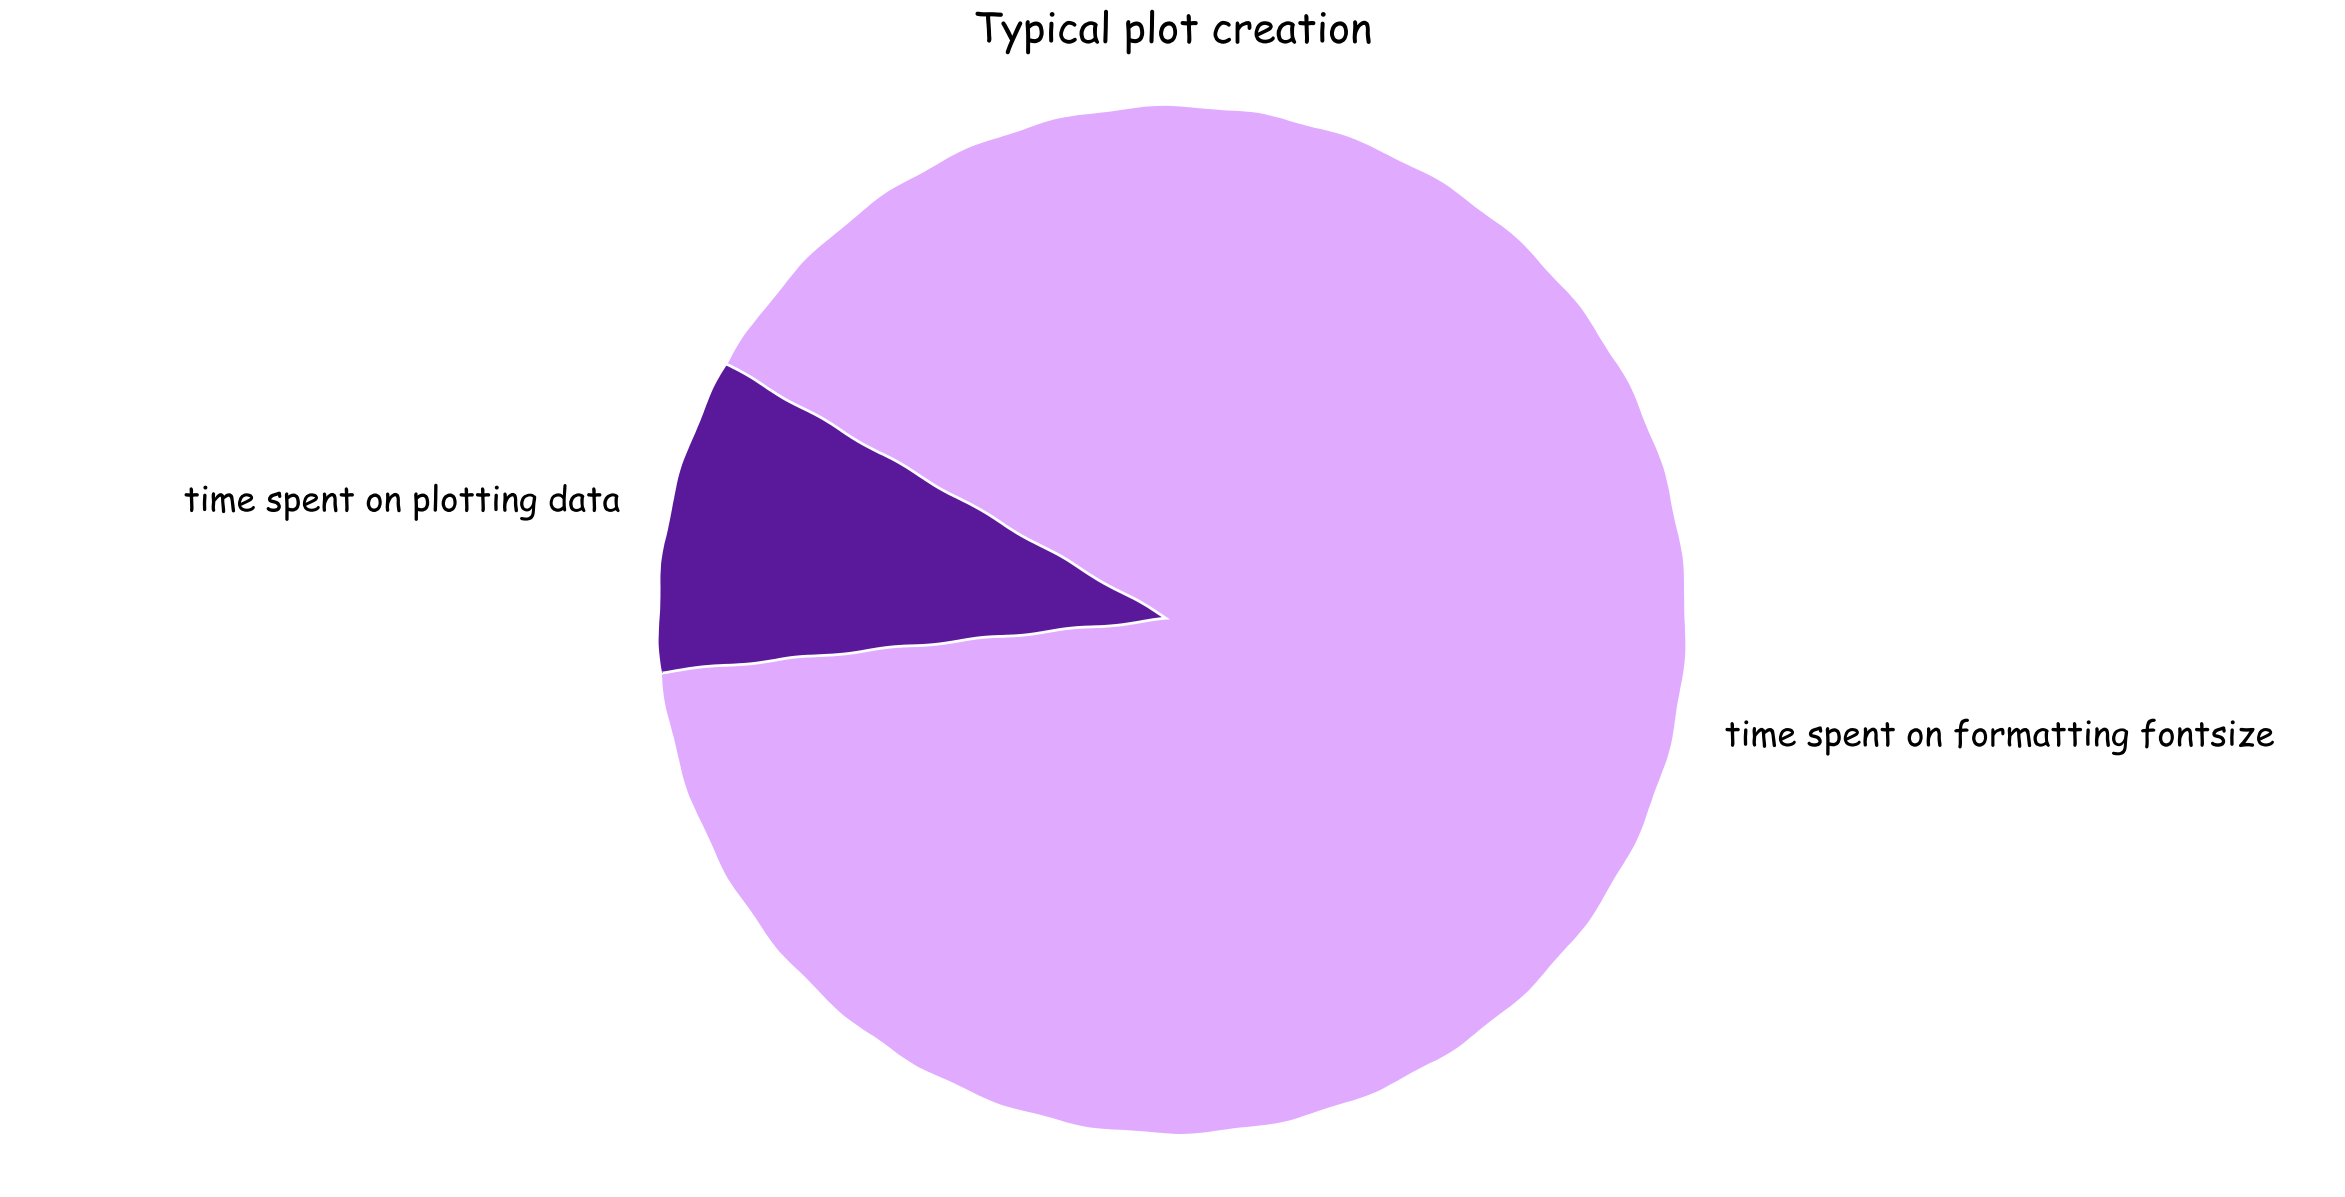

In [195]:
y = [10 , 90]
labels = ["time spent on plotting data", "time spent on formatting fontsize"]
with plt.xkcd():
    fig, ax = plt.subplots()
    ax.pie(y, labels=labels, colors=['#5a189a', '#e0aaff'],
        startangle=150)
    ax.axis('equal')
    plt.title("Typical plot creation", fontsize = 30)
plt.show()
    